<b>Importing Libraries</b>

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
sns.set()
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split

<b>Loading data from dataset</b>

In [3]:
taxitrain = pd.read_csv("Taxitrain.csv")
taxitest = pd.read_csv("Taxitest.csv")

<b>Data Info</b>

In [4]:
taxitrain.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [5]:
taxitrain.shape

(1458644, 11)

In [6]:
taxitrain.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
taxitrain.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
taxitrain.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
taxitrain.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<b>Conversion of datetime variables into datetime format</b>

In [10]:
taxitrain['pickup_datetime']=pd.to_datetime(taxitrain['pickup_datetime'])
taxitrain['dropoff_datetime']=pd.to_datetime(taxitrain['dropoff_datetime'])

<b>EDA</b>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\2333381998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['passenger_count'],kde=False)


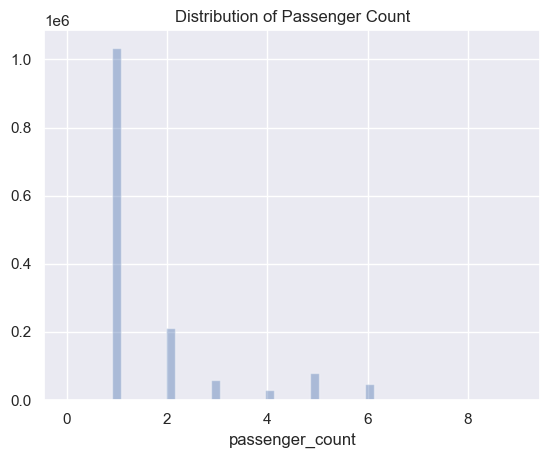

In [11]:
sns.distplot(taxitrain['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [12]:
taxitrain['pickup_datetime'].nunique()


1380222

In [13]:
taxitrain['dropoff_datetime'].nunique()

1380377

<b> Conversion of dates into weekdays </b>

In [14]:
taxitrain['pickup_day']=taxitrain['pickup_datetime'].dt.day_name()
taxitrain['dropoff_day']=taxitrain['dropoff_datetime'].dt.day_name()

In [15]:
taxitrain['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

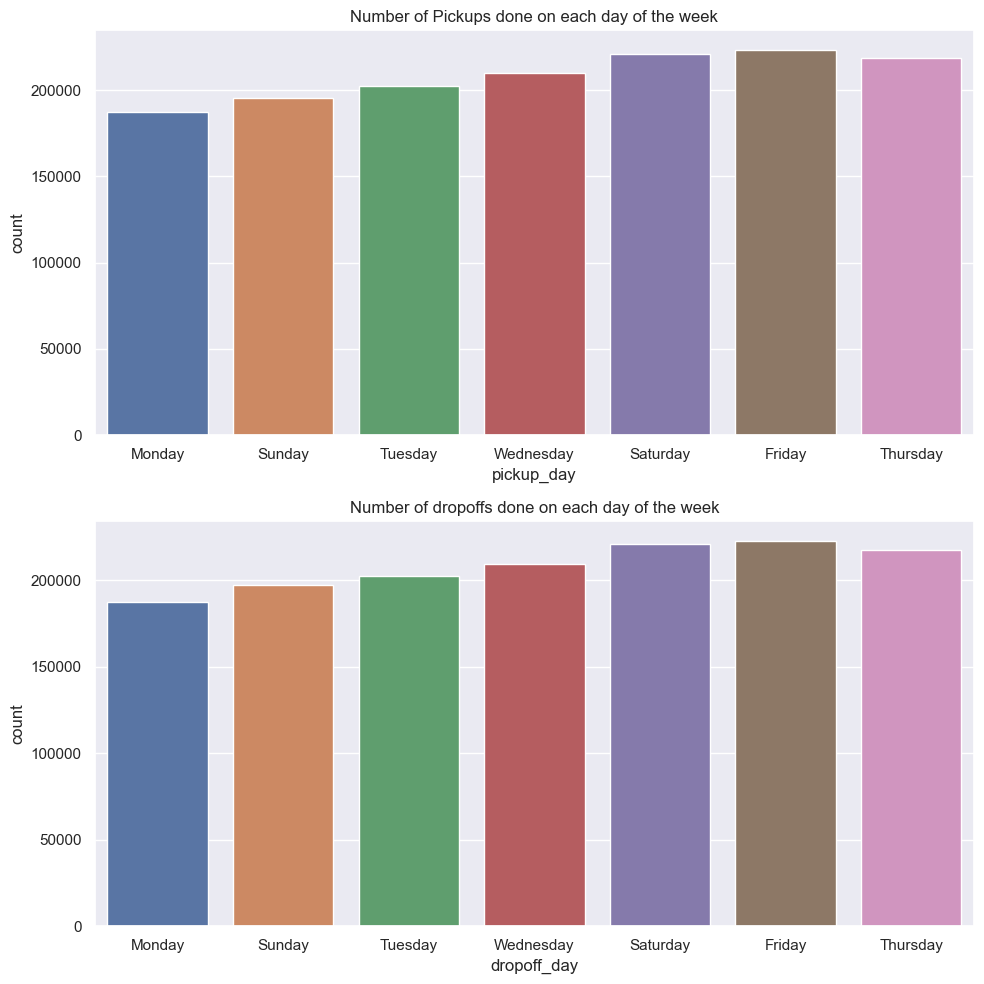

In [16]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=taxitrain,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=taxitrain,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [17]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
taxitrain['pickup_timezone']=taxitrain['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
taxitrain['dropoff_timezone']=taxitrain['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

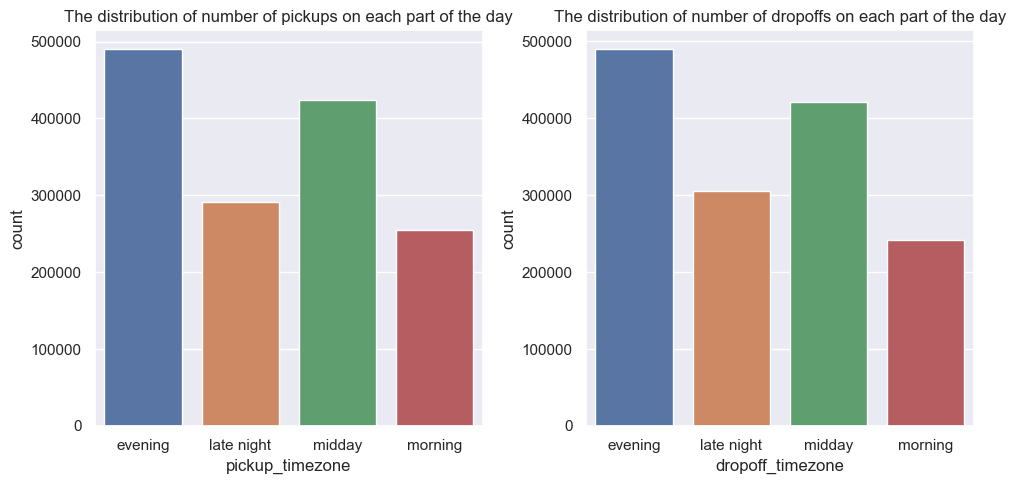

In [18]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=taxitrain,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=taxitrain,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

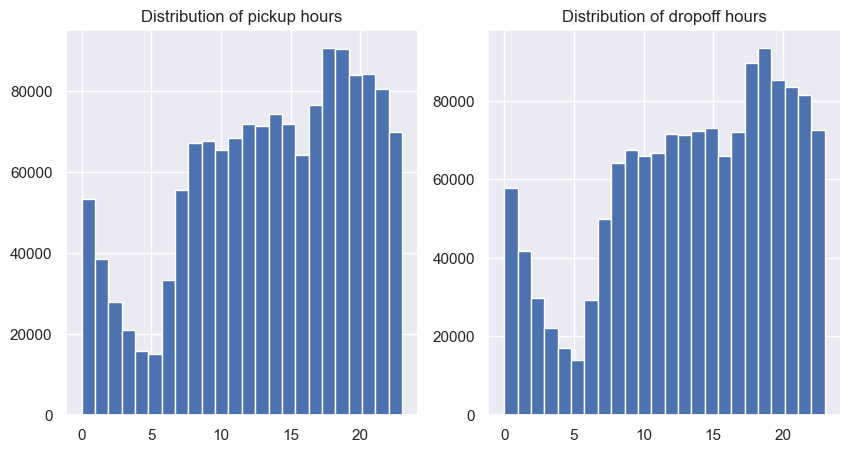

In [19]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
taxitrain['pickup_hour']=taxitrain['pickup_datetime'].dt.hour
taxitrain.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
taxitrain['dropoff_hour']=taxitrain['dropoff_datetime'].dt.hour
taxitrain.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [20]:
taxitrain['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\1191701797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['trip_duration'],kde=False)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

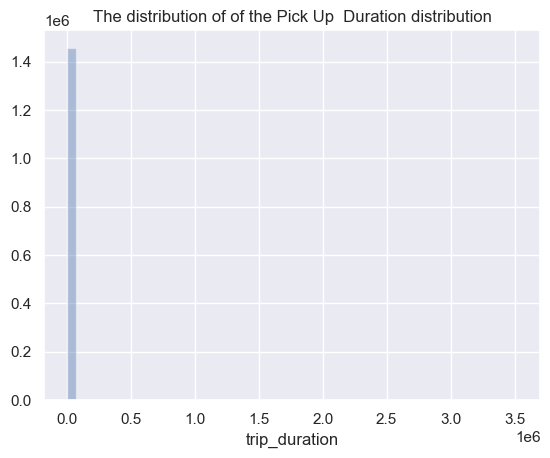

In [21]:
sns.distplot(taxitrain['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

In [22]:
bins=np.array([0,1800,3600,5400,7200,90000])
taxitrain['duration_time']=pd.cut(taxitrain.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\2368536038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['pickup_longitude'])


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

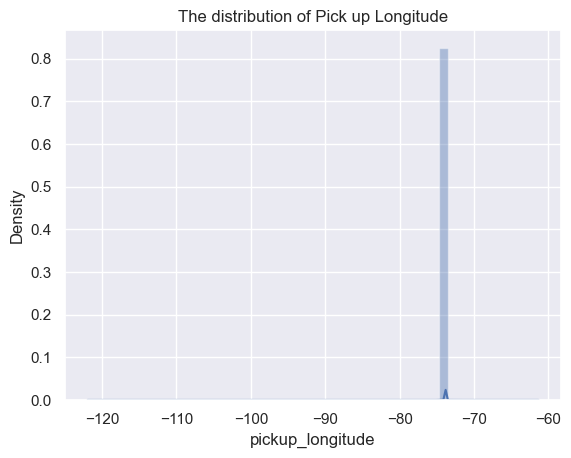

In [23]:
sns.distplot(taxitrain['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\3146233261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['dropoff_latitude'])


Text(0.5, 1.0, 'The distribution of drop off Latitude')

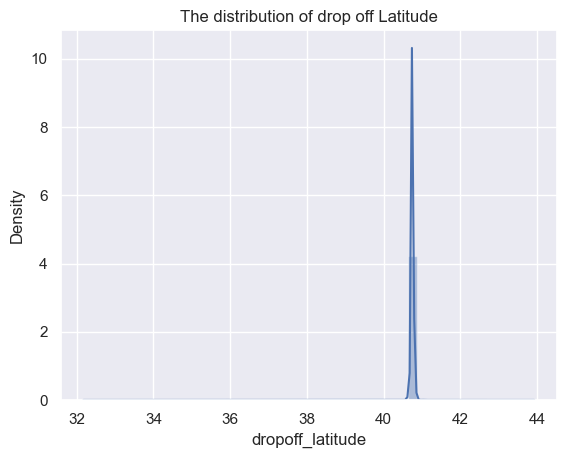

In [24]:
sns.distplot(taxitrain['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\3744450167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['pickup_latitude'])


Text(0.5, 1.0, 'The distribution of pick up Latitude')

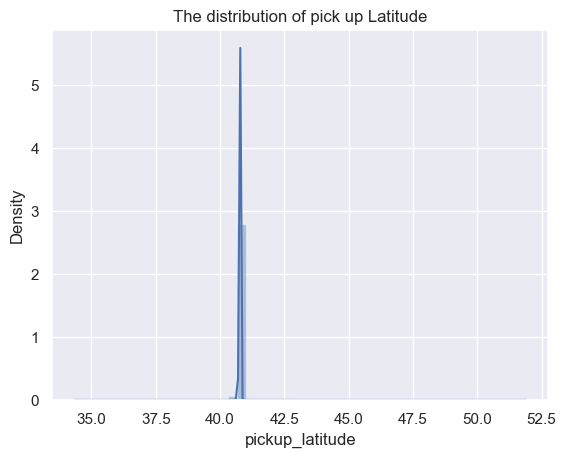

In [25]:
sns.distplot(taxitrain['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\1172951946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxitrain['dropoff_longitude'])


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

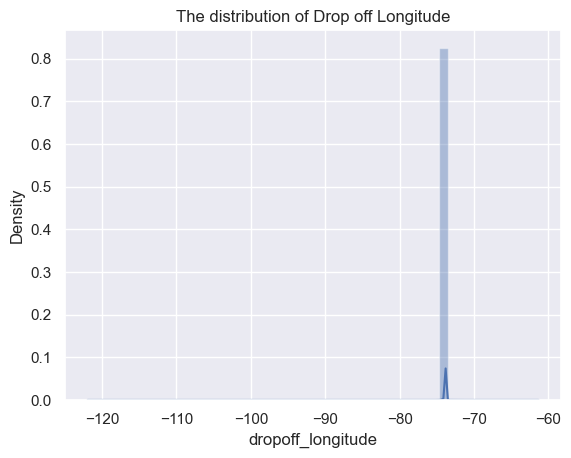

In [26]:
sns.distplot(taxitrain['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

<Axes: >

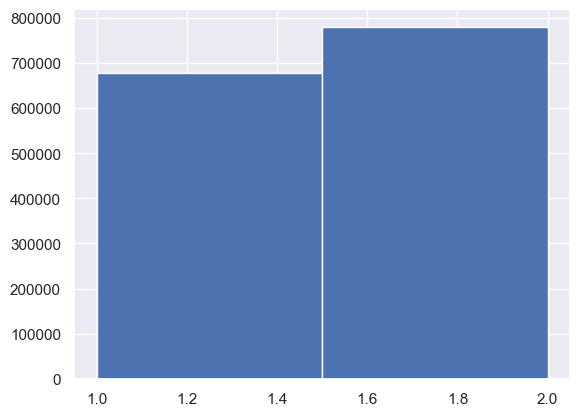

In [27]:
taxitrain['vendor_id'].hist(bins=2)

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

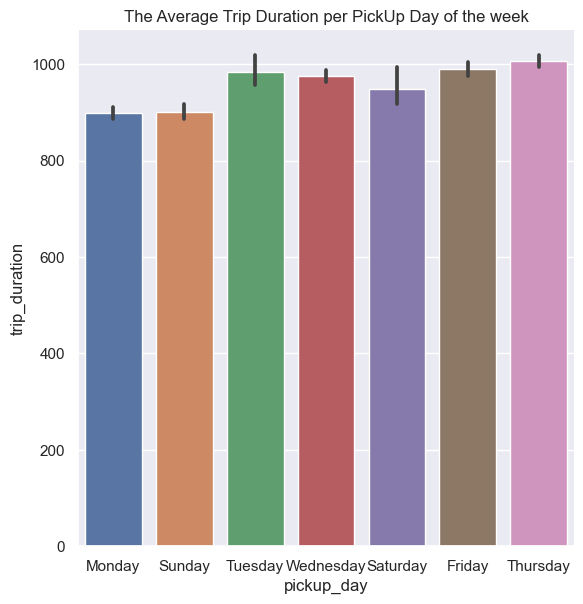

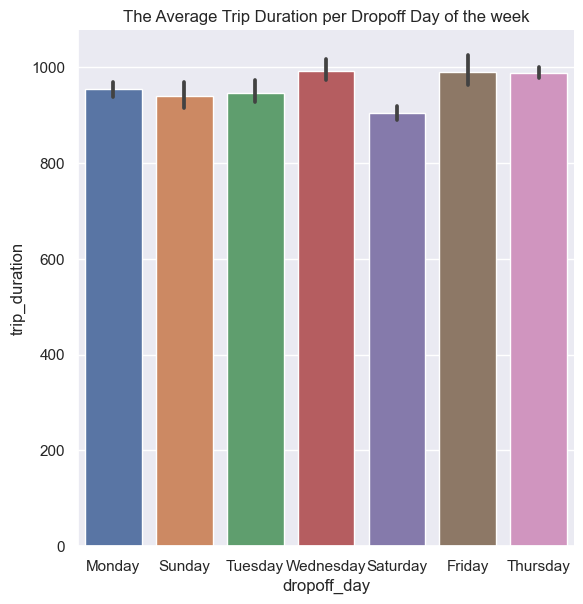

In [28]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=taxitrain,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=taxitrain,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

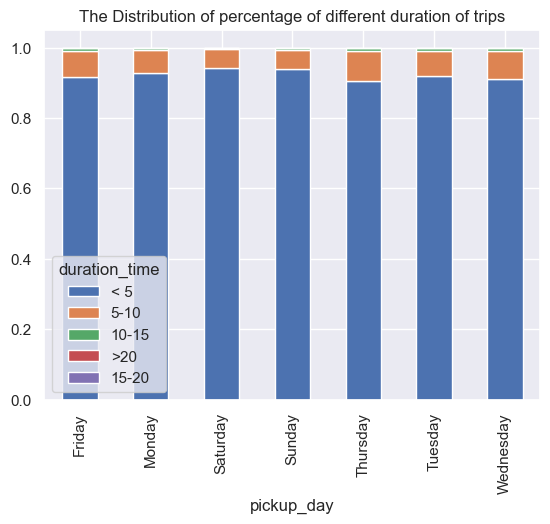

In [29]:
ax1=taxitrain.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

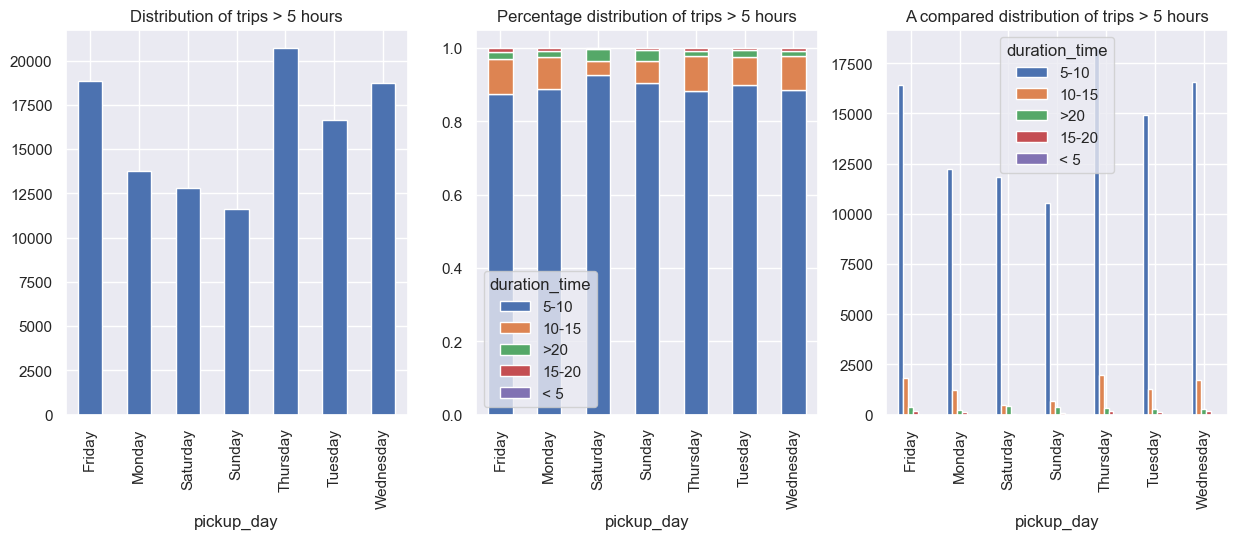

In [30]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=taxitrain[(taxitrain.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=taxitrain[(taxitrain.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=taxitrain[(taxitrain.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')


C:\Users\Lenovo\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


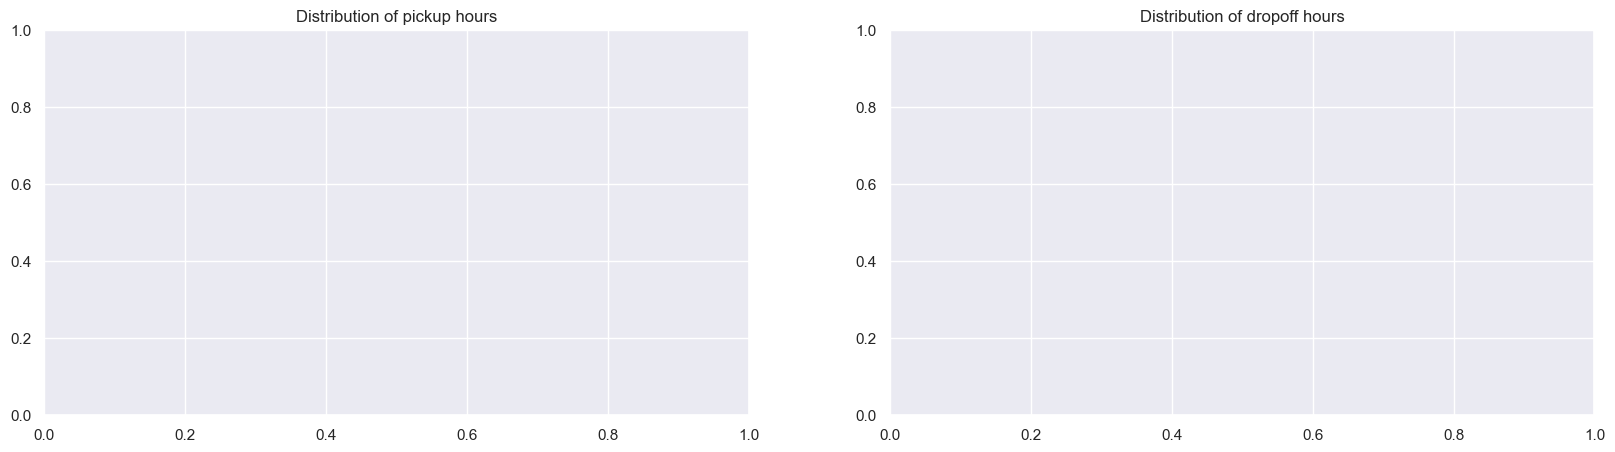

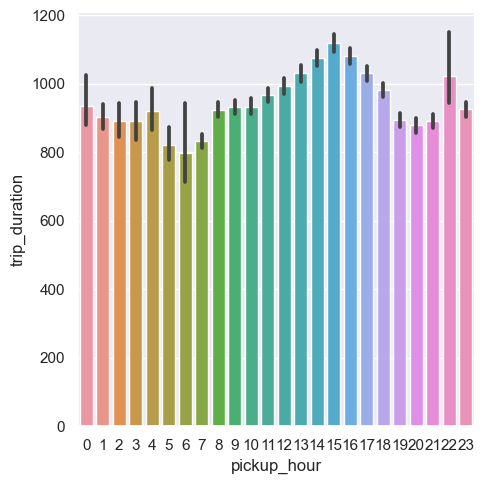

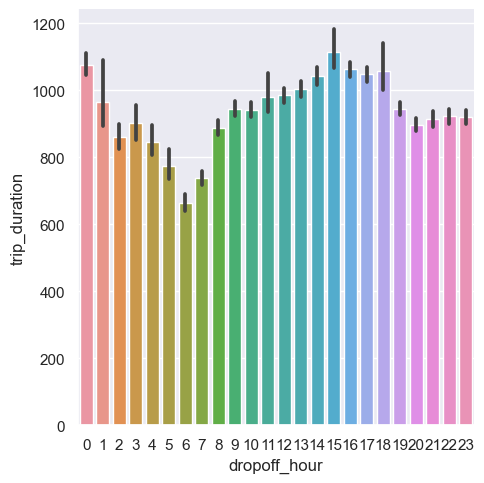

In [31]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=taxitrain,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=taxitrain,ax=ax2)
plt.show()


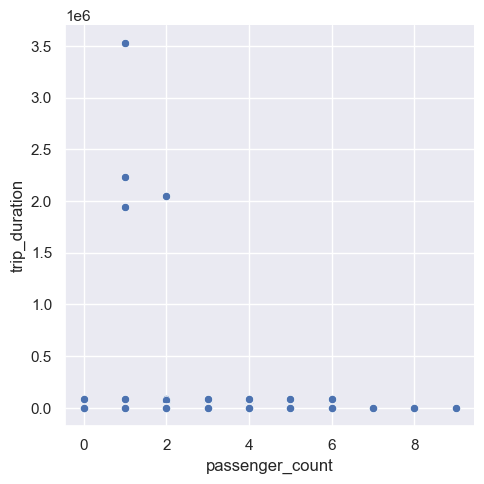

In [32]:
sns.relplot(x="passenger_count", y="trip_duration", data=taxitrain, kind="scatter")

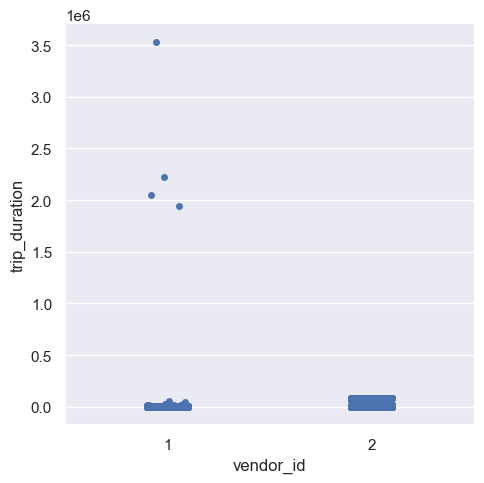

In [33]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=taxitrain)

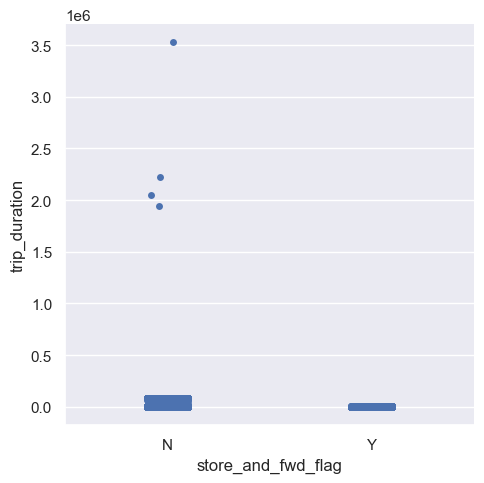

In [34]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=taxitrain)

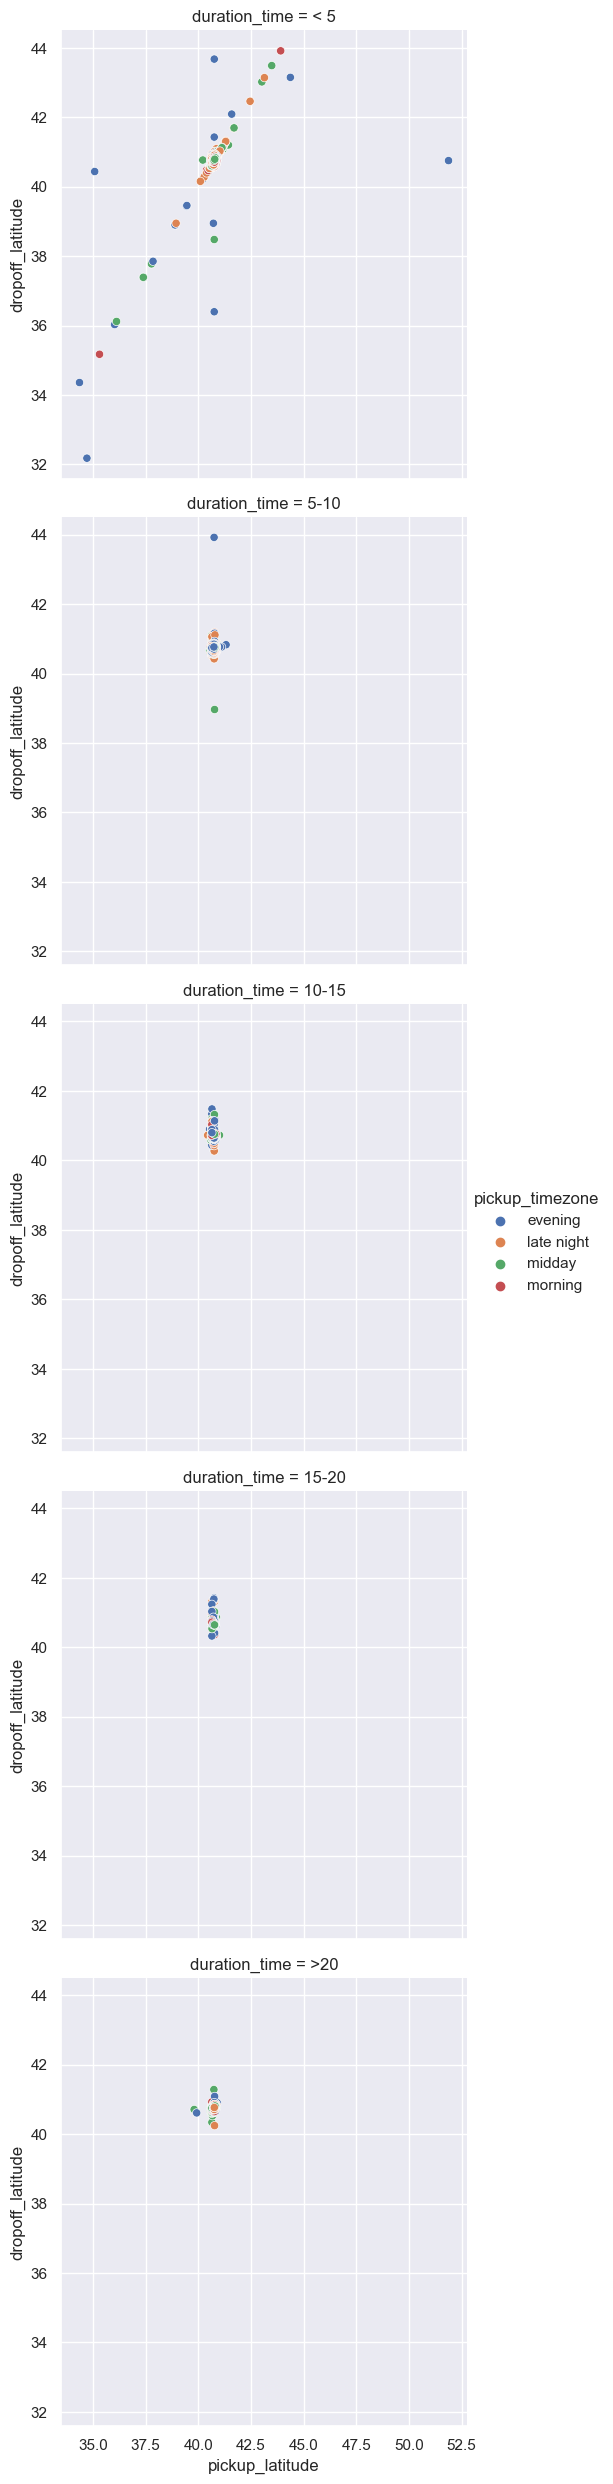

In [35]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=taxitrain);

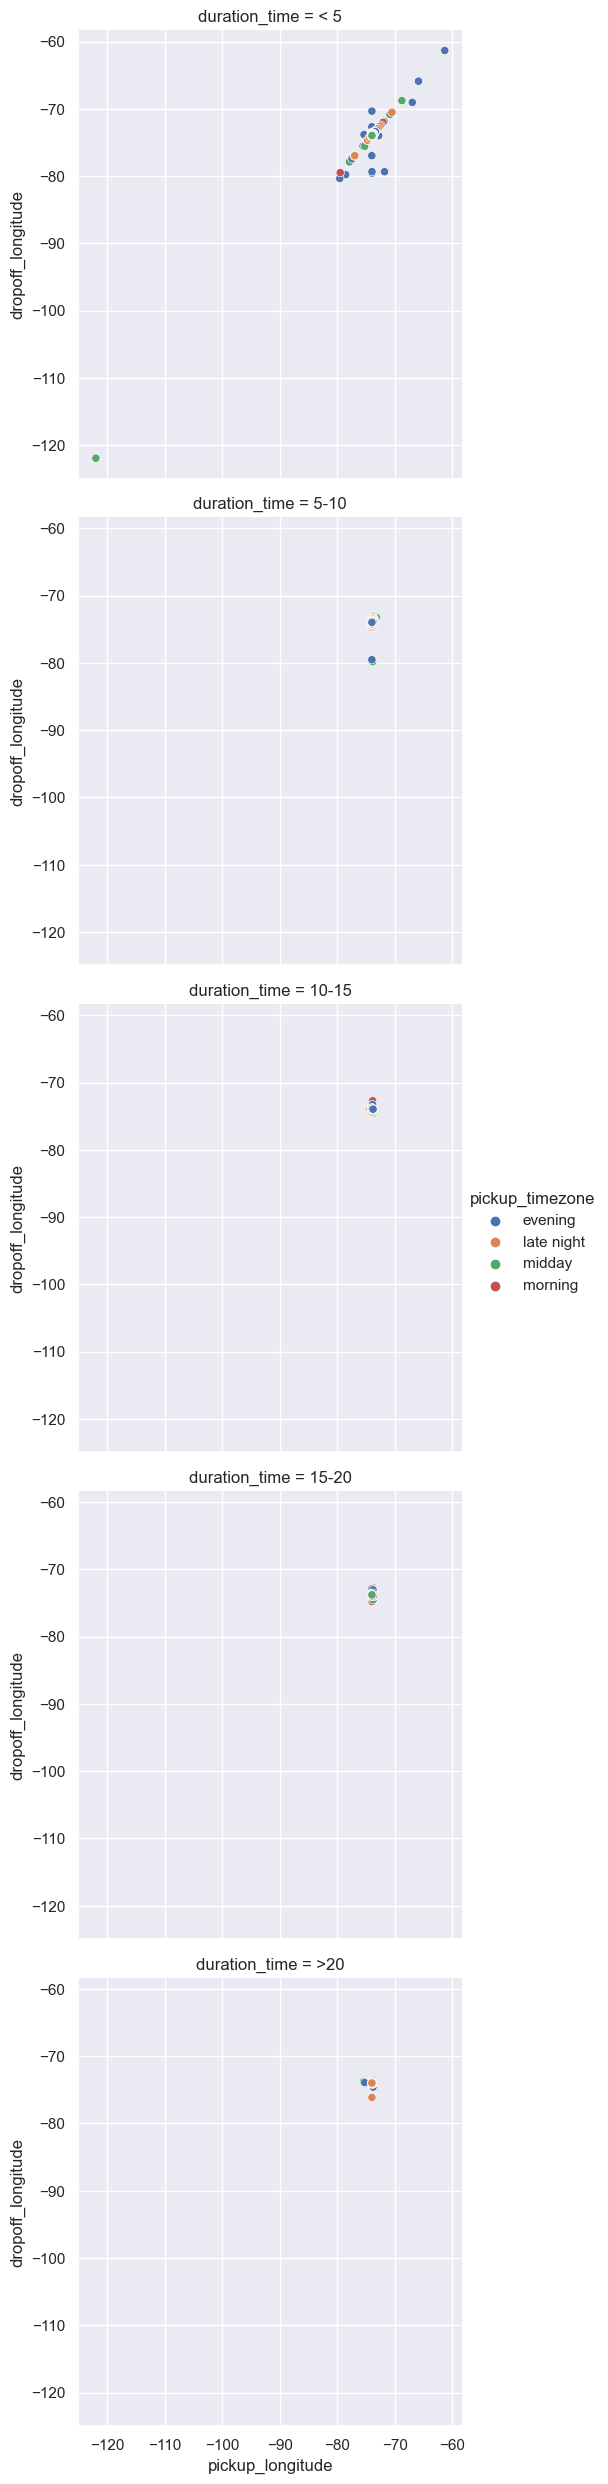

In [36]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=taxitrain);

<b> Trip Duration </b>

In [37]:
taxitrain['trip_duration_hour']=taxitrain['trip_duration']/3600 

In [38]:
taxitrain.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [39]:
taxitrain=taxitrain[taxitrain.passenger_count<=6]
taxitrain=taxitrain[taxitrain.passenger_count!=0]

In [40]:
taxitrain['pickup_day']=taxitrain['pickup_datetime'].dt.day_name()
taxitrain['dropoff_day']=taxitrain['dropoff_datetime'].dt.day_name()
taxitrain['pickup_month']=taxitrain['pickup_datetime'].dt.month
taxitrain['dropoff_month']=taxitrain['dropoff_datetime'].dt.month

In [41]:
taxitrain['pickup_month'].value_counts()

3    256179
4    251636
5    248474
2    238288
6    234310
1    229692
Name: pickup_month, dtype: int64

In [42]:
taxitrain['dropoff_month'].value_counts()

3    256125
4    251627
5    248542
2    238280
6    234237
1    229641
7       127
Name: dropoff_month, dtype: int64

In [43]:
print(taxitrain[taxitrain.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(taxitrain[taxitrain.dropoff_month==7].pickup_datetime.dt.day.value_counts())


6    127
Name: pickup_datetime, dtype: int64
30    127
Name: pickup_datetime, dtype: int64


<b> Distance Calculation </b>

In [44]:
from math import radians, cos, sin, asin, sqrt

In [45]:
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [46]:
taxitrain['distance'] = taxitrain.apply(lambda x: haversine(x), axis = 1)

In [47]:
print('The no of rows with distance =0 are {}'.format(len(taxitrain[taxitrain.distance==0])))


The no of rows with distance =0 are 5887


In [48]:
mean_dist=taxitrain['distance'].mean()
taxitrain.loc[taxitrain['distance']==0,'distance']=mean_dist

<Axes: >

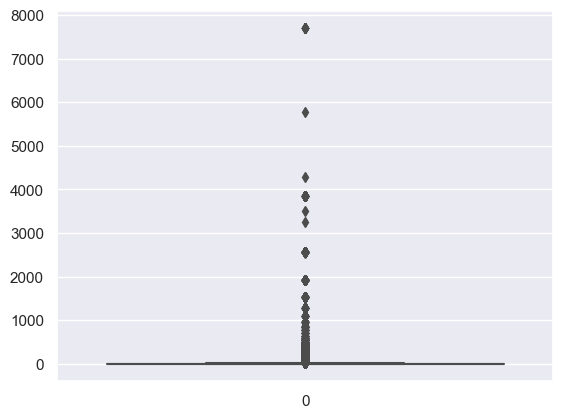

In [49]:
taxitrain['speed']=taxitrain['distance']/taxitrain['trip_duration_hour']
sns.boxplot(taxitrain['speed'])

<Axes: xlabel='distance', ylabel='trip_duration_hour'>

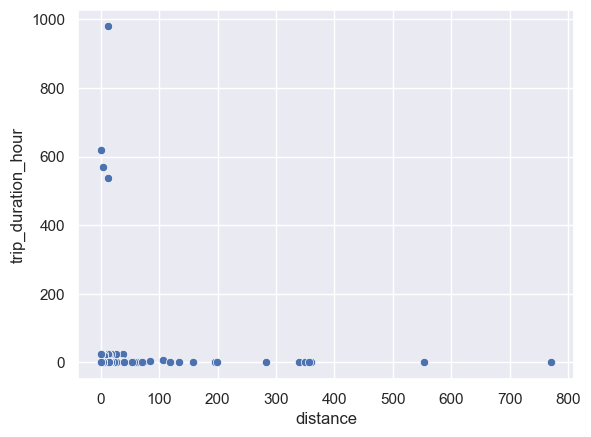

In [50]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=taxitrain)

<Axes: xlabel='log_distance', ylabel='log_trip_duration'>

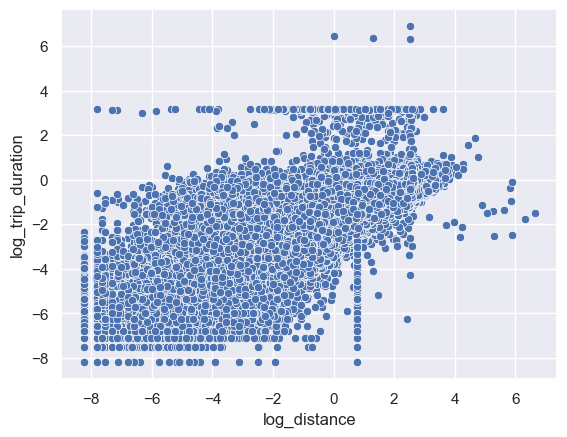

In [51]:
taxitrain['log_distance']=np.log(taxitrain.distance)
taxitrain['log_trip_duration']=np.log(taxitrain.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=taxitrain)

In [52]:
taxitrain=taxitrain[taxitrain.log_trip_duration<2]

In [53]:
taxitrain.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time',
       'trip_duration_hour', 'pickup_month', 'dropoff_month', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [54]:
data2=taxitrain.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [55]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [56]:
base_line_col=['distance']
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
               'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
               'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night',
               'pickup_timezone_midday','pickup_timezone_morning','dropoff_timezone_evening',
               'dropoff_timezone_late night','dropoff_timezone_midday','dropoff_timezone_morning']
target_col=['trip_duration']

<b> Model Training </b>

In [57]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
   
    estimator.fit(data_train[predictors],data_train.loc[:,target])
   
    train_pred=estimator.predict(data_train[predictors])
  
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=30,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    return test_pred

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.30
seed = 7
X_train, X_test = train_test_split(data2,test_size=validation_size, random_state=seed)

In [59]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col],mean_pred))

667.8930555253861

In [60]:
alg1 = LinearRegression()
print('The baseline model')
y_pred=modelfit(alg1, X_train, X_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 474.8
CV Score : Mean - 471.1 | Std - 73.83 | Min - 421.6 | Max - 804.3
RMSE on Test Data: 489.9
The coeffient is [[178.31651934]]



Model Report
RMSE on Train Data: 461.1
CV Score : Mean - 457.1 | Std - 76.13 | Min - 405.9 | Max - 800.1
RMSE on Test Data: 476.4


<Axes: title={'center': 'Model Coefficients'}>

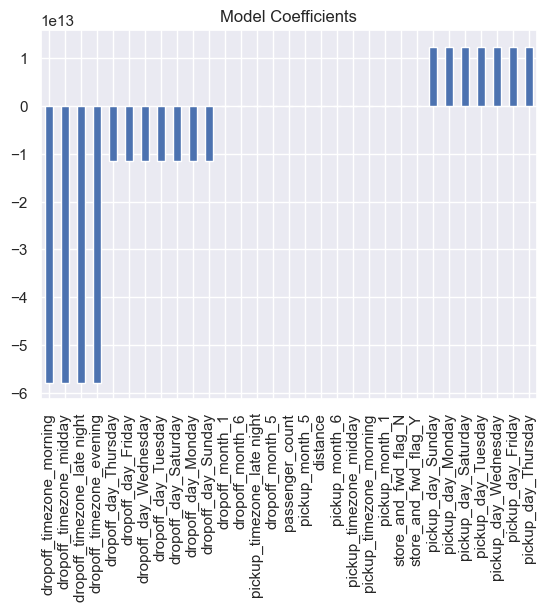

In [61]:
alg2 = LinearRegression()
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [62]:
pip install statsmodels

In [63]:
import statsmodels.api as sm

In [64]:
residuals=y_pred-X_test[target_col]
residuals_squared = np.square(residuals)
X = sm.add_constant(X_test)  
model = sm.OLS(residuals_squared, X)
results = model.fit()
bp_test_statistic = results.nobs * results.rsquared
bp_p_value = results.pvalues[1]

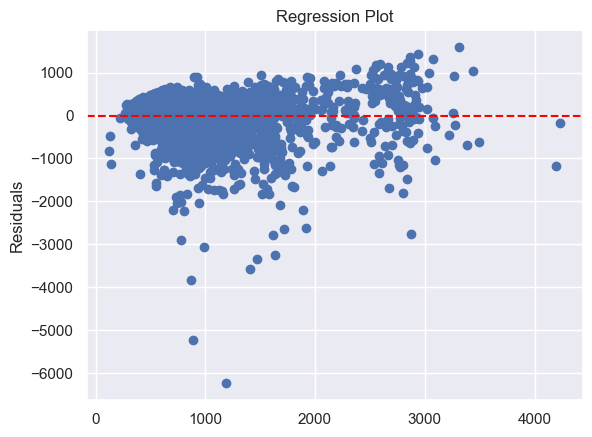

In [65]:
start_index = 0
end_index = 5000 

plt.scatter(y_pred[start_index:end_index], residuals[start_index:end_index])
plt.axhline(0, color='red', linestyle='--')  
plt.ylabel('Residuals')
plt.title('Regression Plot')
plt.show()

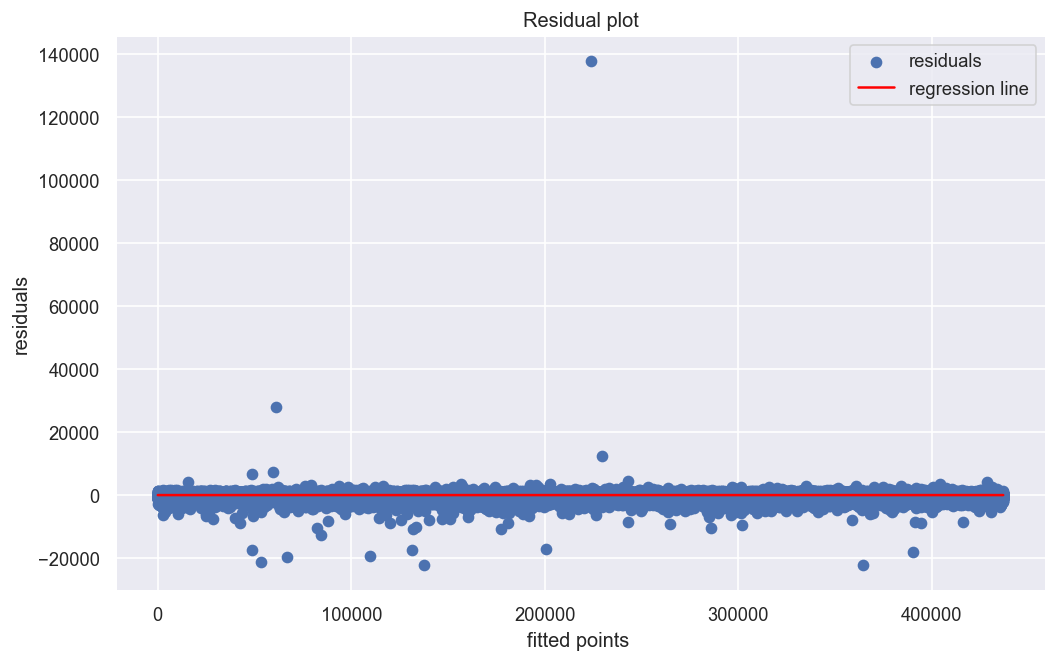

In [72]:
residuals=y_pred-X_test[target_col]
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(len(residuals))
k = [0 for i in range(len(residuals))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()